## Measure how OpenTTDLab scales

This example shows how you can measure how well the performance of OpenTTDLab scales are you increase the (maximum) number of workers it uses.

First install OpenTTDLab, pandas, and plotly.

In [ ]:
!python -m pip install OpenTTDLab==0.0.42 pandas==2.2.0 plotly==5.18.0

The run a series of experiments of OpenTTDLab, varying the number of workers used and recording how long each takes.

In [5]:
import time
from openttdlab import run_experiment, bananas_file

def run_experiment_timed(max_workers):
    start = time.monotonic()
    run_experiment(
        days=365 * 4 + 1,
        seeds=range(0, 32),
        ais=(
            bananas_file('54524149', 'trAIns'),
        ),
        max_workers=max_workers,
    )
    end = time.monotonic()
    return (end - start)

results = [
    {
         'max_workers': max_workers,
         'wallclock_time': run_experiment_timed(max_workers),
    }
    for max_workers in range(1, 9)
]

You can then plot these time values

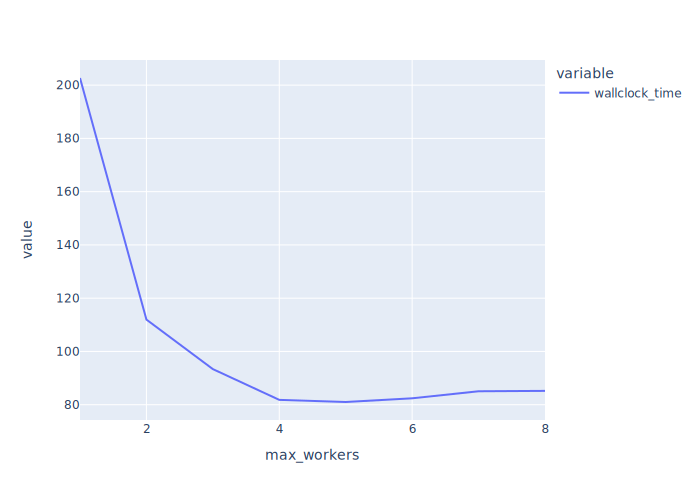

In [71]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# This makes the charts visible for publishing this notebook to GitHub
# Comment it out for an interactive chart
pio.renderers.default = "svg"

df = pd.DataFrame(results)
df = df.set_index('max_workers')
fig = px.line(df)
fig

You can also plot these as "speedup".

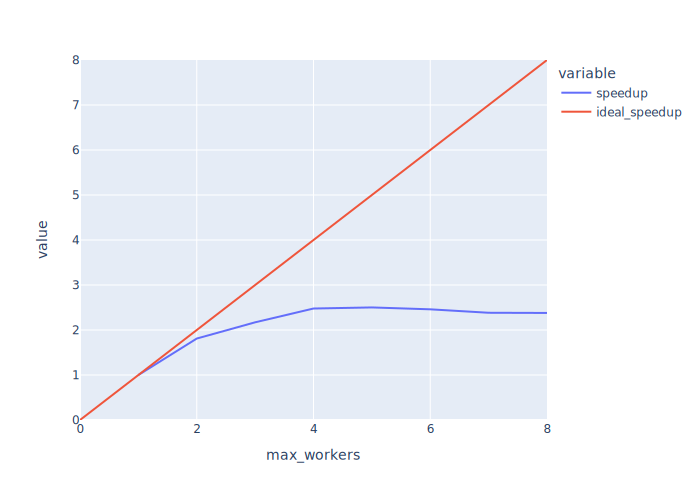

In [77]:
single_processor_time = df.loc[1]['wallclock_time']
df['speedup'] = single_processor_time/ df['wallclock_time']
df['ideal_speedup'] = df.index
df.loc[0] = [0, None, 0]  # Rough and ready way of adding the origin

fig = px.line(df, y=['speedup', 'ideal_speedup'])
fig.update_yaxes(range=[0, 8])
fig.update_xaxes(range=[0, 8])
fig

The speedup is pretty far from ideal here, especially considering...

In [56]:
import os
os.cpu_count()

8

There are 8 processors!